In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import PIL
from scipy.ndimage import rotate

%load_ext autoreload
%autoreload 2

In [2]:
image = cv2.imread("publaynet/train/PMC1064098_00000.jpg")

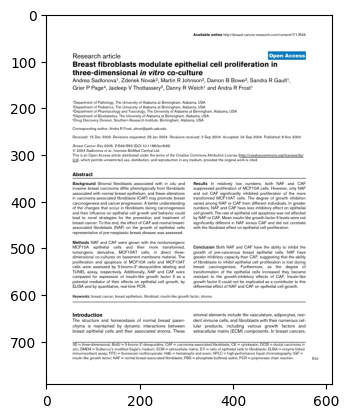

In [3]:
plt.imshow(image[:,:,::-1])

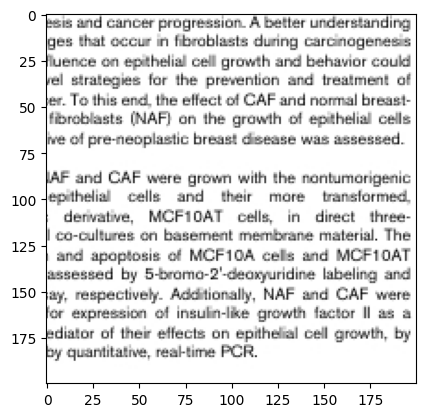

In [4]:
cutimage = image[400:600,100:300]
plt.imshow(cutimage[:,:,::-1])

<function matplotlib.pyplot.show(close=None, block=None)>

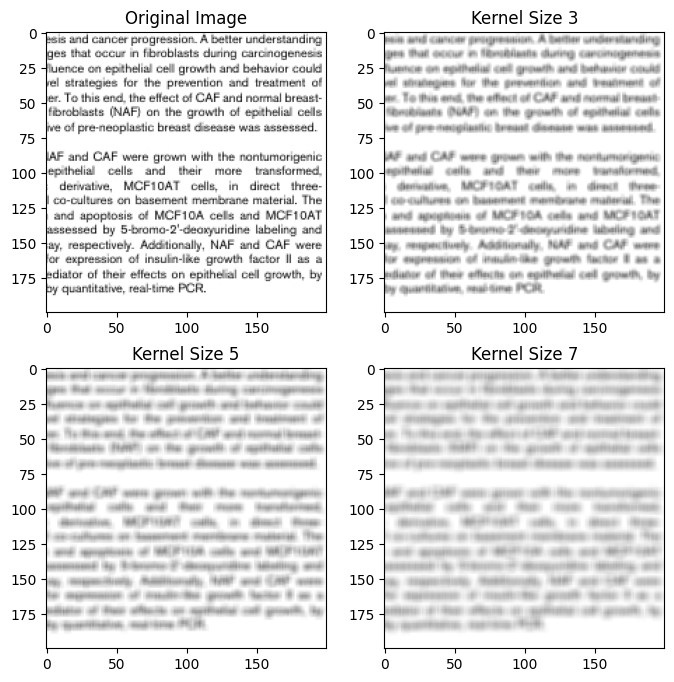

In [5]:
fig = plt.figure(figsize=(8,8))
for i,j in enumerate(range(1,9,2)):
    gauss = cv2.GaussianBlur(cutimage,(j,j),cv2.BORDER_DEFAULT)
    fig.add_subplot(2,2,i+1)
    plt.imshow(gauss[:,:,::-1])
    plt.title(f"Kernel Size {j}" if j>1 else "Original Image")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

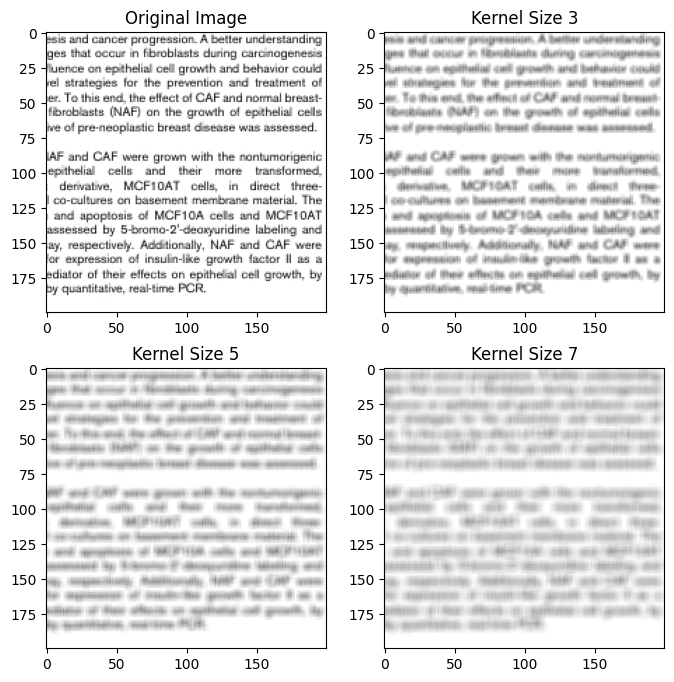

In [6]:
fig = plt.figure(figsize=(8,8))
for i,j in enumerate(range(1,9,2)):
    gauss = cv2.blur(cutimage,(j,j))
    fig.add_subplot(2,2,i+1)
    plt.imshow(gauss[:,:,::-1])
    plt.title(f"Kernel Size {j}" if j>1 else "Original Image")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

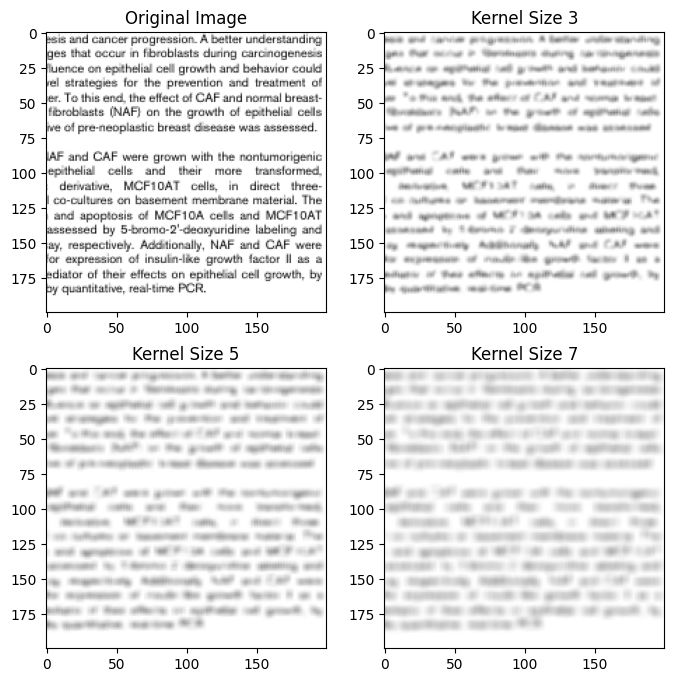

In [7]:
fig = plt.figure(figsize=(8,8))
for i,j in enumerate(range(1,9,2)):
    gauss = cv2.medianBlur(cutimage,3 if j>1 else 1)
    gauss = cv2.GaussianBlur(gauss,(j,j),cv2.BORDER_DEFAULT)
    fig.add_subplot(2,2,i+1)
    plt.imshow(gauss[:,:,::-1])
    plt.title(f"Kernel Size {j}" if j>1 else "Original Image")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

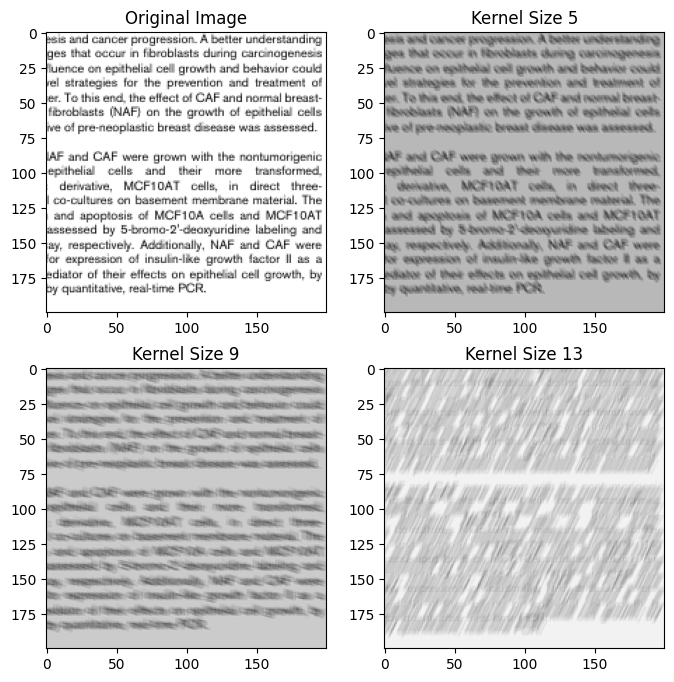

In [8]:
fig = plt.figure(figsize=(8,8))
for i,j in enumerate(range(1,14,4)):
    kernel = np.zeros((j, j))
    kernel[j//2, :] = 1
    kernel = kernel / np.sum(kernel)
    random_angle = np.random.randint(0, 180)
    kernel = rotate(kernel, random_angle)
    gauss = cv2.filter2D(cutimage, -1, kernel)
    fig.add_subplot(2,2,i+1)
    plt.imshow(gauss[:,:,::-1])
    plt.title(f"Kernel Size {j}" if j>1 else "Original Image")
plt.show

In [9]:
h,w = 800,700
img_dim = (400,400)
np.random.randint(h-img_dim[0])

312

In [1]:
from customDataSet import CustomDataset

In [90]:
myds = CustomDataset()

filtered 334548
fileName 334548
size 47794


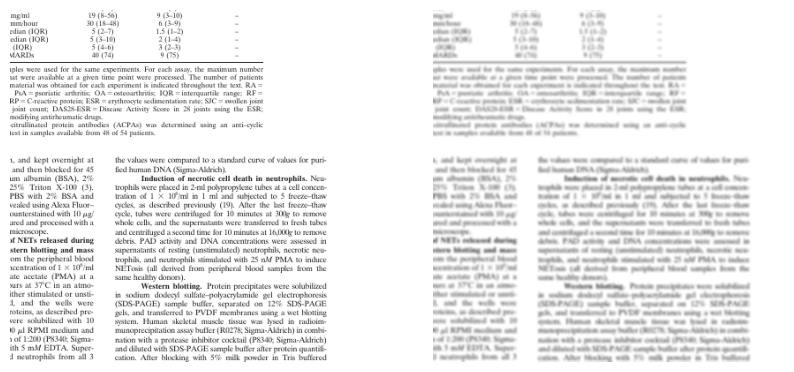

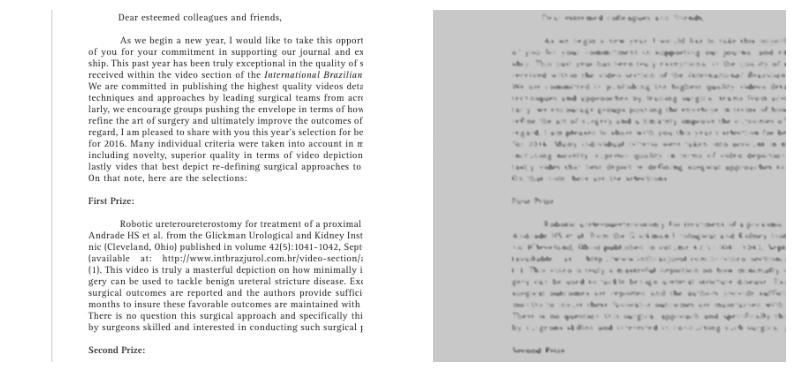

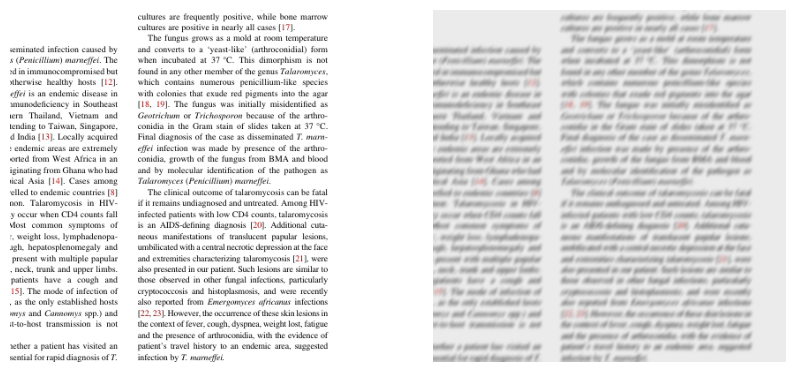

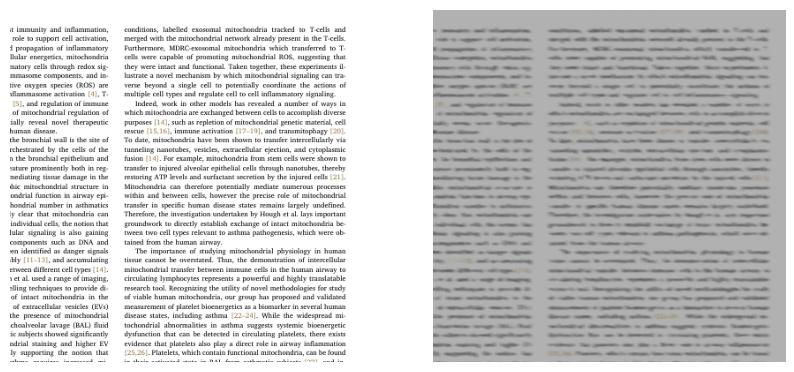

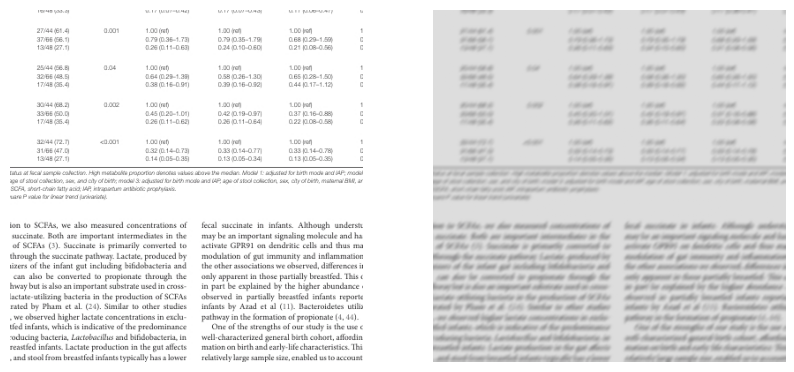

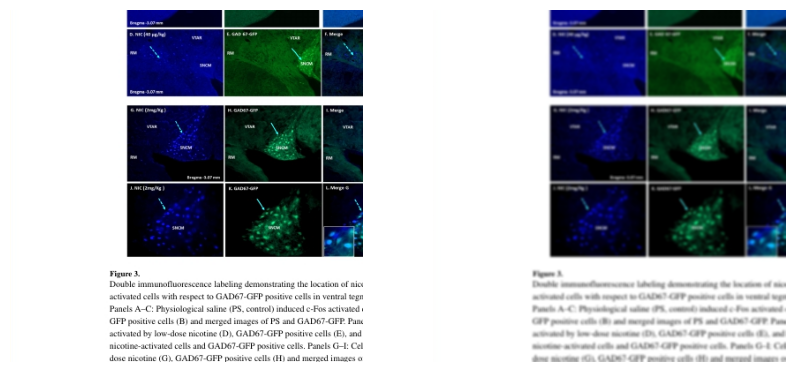

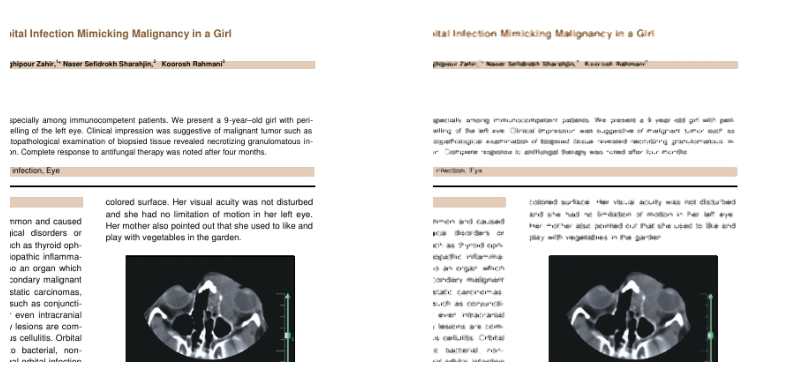

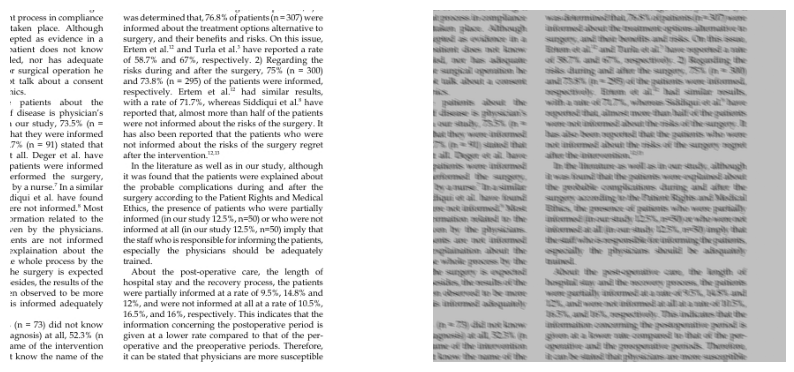

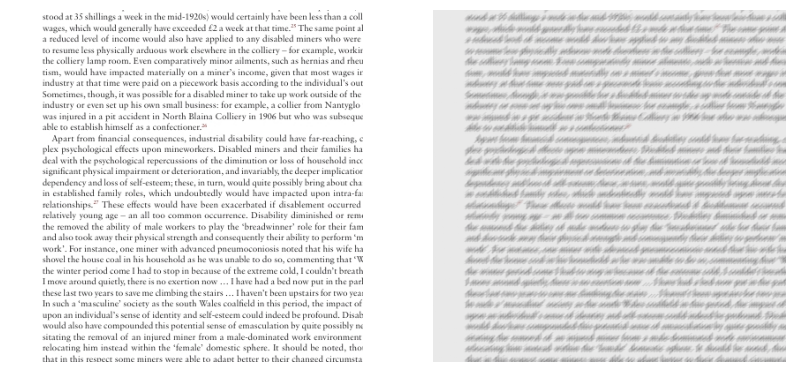

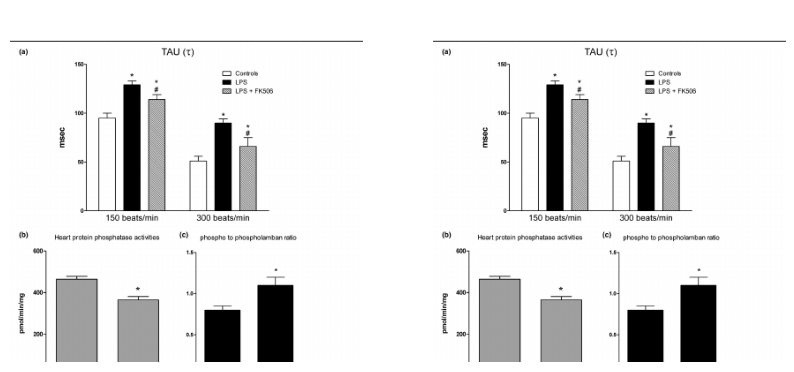

In [92]:
for i in range(10):
    fig = plt.figure(figsize = (10,20))
    y, x = myds[np.random.randint(47794)]
    fig.add_subplot(1,2,1)
    plt.imshow(x.numpy().transpose(1,2,0))
    plt.axis("off")
    fig.add_subplot(1,2,2)
    plt.imshow(y.numpy().transpose(1,2,0))
    plt.axis("off")

In [28]:
import cv2
import numpy as np
import os
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import torchvision.transforms.transforms as TF
from customDataSet import CustomDataset
import pickle
doc_dir = "../../publaynet/"
result_dir = "../results/pretrain"
original_dir = os.path.join(result_dir,"original")
blurred_dir = os.path.join(result_dir,"blurred")
restored_dir = os.path.join(result_dir,"restored")

In [2]:
myds = CustomDataset(doc_dir,(400,400),False)
topil = TF.ToPILImage()

size 47958


PMC6027754_00002


(-0.5, 399.5, 399.5, -0.5)

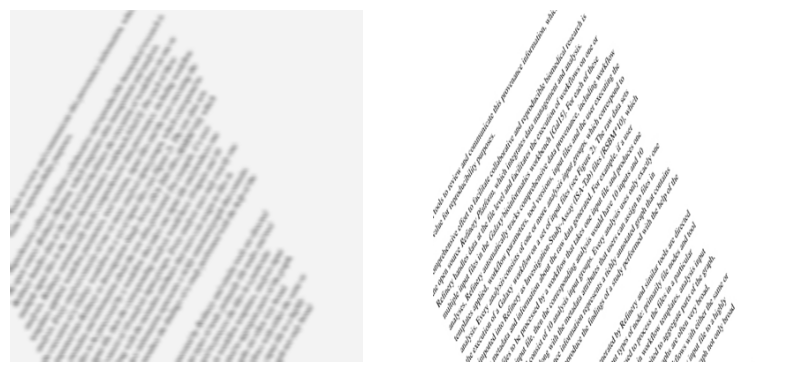

In [10]:
randomx = np.random.randint(47958)
blur,img,filename = myds[randomx]
print(filename)
blur,img = topil(blur),topil(img)
fig = plt.figure(figsize = (10,20))
fig.add_subplot(1,2,1)
plt.imshow(blur)
plt.axis("off")
fig.add_subplot(1,2,2)
plt.imshow(img)
plt.axis("off")

In [4]:
cv2.imwrite("tester.png",cv2.cvtColor(np.asarray(img), cv2.COLOR_RGB2BGR))

True

In [29]:
with open("PSNRs.pkl","rb") as f:
    psnrs = pickle.load(f)
psnrs = pd.Series(psnrs)
psnrs.sort_values(ascending=False,inplace=True)

In [37]:
psnrs.shape

(47958,)

Text(0.5, 1.0, 'Restored')

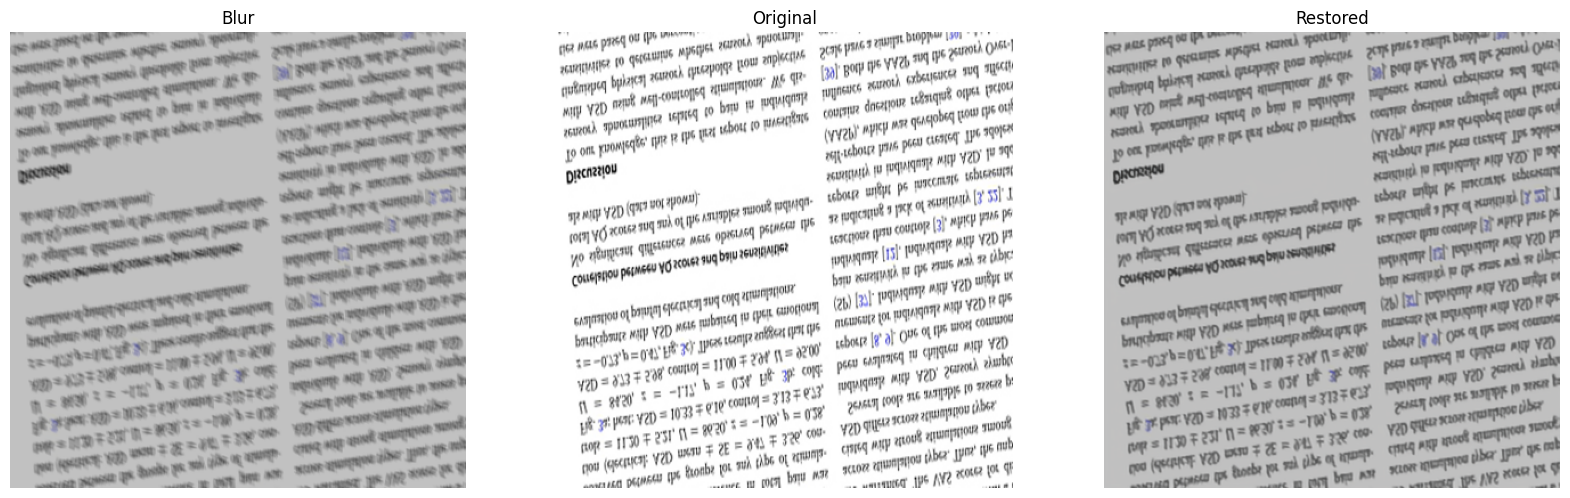

In [41]:
m = "PMC4779208_00005"
blur,img,res = Image.open((os.path.join(blurred_dir, m+'.png'))),Image.open((os.path.join(original_dir, m+'.png'))),Image.open((os.path.join(restored_dir, m+'.png')))
fig = plt.figure(figsize = (20,60))
fig.add_subplot(1,3,1)
plt.imshow(blur)
plt.axis("off")
plt.title('Blur')
fig.add_subplot(1,3,2)
plt.imshow(img)
plt.axis("off")
plt.title('Original')
fig.add_subplot(1,3,3)
plt.imshow(res)
plt.axis("off")
plt.title('Restored')